In [ ]:
!pip install psutil

Program Started....
T = 1		50.32
T = 2		31.22
T = 3		26.30
T = 4		24.40
T = 5		23.48
T = 6		23.76
T = 7		24.01
T = 8		22.97

Threads		Time Taken(sec)
T = 1		50.32
T = 2		31.22
T = 3		26.30
T = 4		24.40
T = 5		23.48
T = 6		23.76
T = 7		24.01
T = 8		22.97


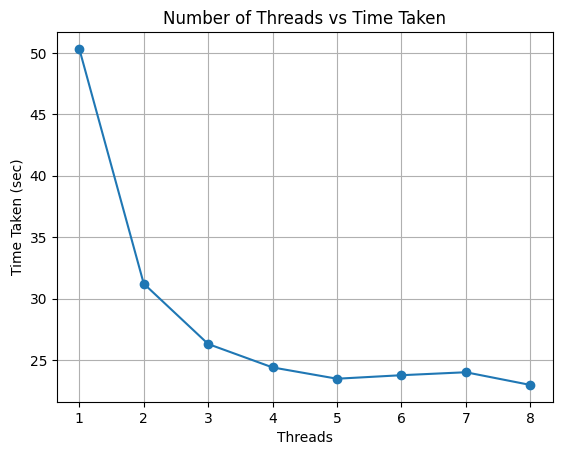


CPU Usage:
T = 1		19.80%
T = 2		2.50%
T = 3		1.00%
T = 4		1.00%
T = 5		2.50%
T = 6		2.50%
T = 7		2.50%
T = 8		2.00%


In [5]:
import numpy as np
import time
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import psutil

def multiply_matrices(_):
    np.random.seed()
    A = np.random.rand(1000, 1000)
    B = np.random.rand(1000, 1000)
    C = np.random.rand(1000, 1000)  # Constant matrix
    result = np.dot(np.dot(A, B), C)
    return result

def task(num_matrices, num_threads):
    start_time = time.time()
    with Pool(processes=num_threads) as p:
        results = p.map(multiply_matrices, range(num_matrices))
    end_time = time.time()
    total_time = end_time - start_time
    return total_time

def get_cpu_usage():
    return psutil.cpu_percent(interval=1)

if __name__ == '__main__':
    num_matrices = 100
    num_threads_range = range(1, 9)  # Range of number of threads
    time_taken = []  # To store time taken for each number of threads

    print("Program Started....")

    # Main loop to run the task function with different numbers of threads
    for num_threads in num_threads_range:
        total_time = task(num_matrices, num_threads)
        time_taken.append(total_time)

        print(f"T = {num_threads}\t\t{total_time:.2f}")

    # Generate the table
    print("\nThreads\t\tTime Taken(sec)")
    for i in range(len(num_threads_range)):
        print(f"T = {num_threads_range[i]}\t\t{time_taken[i]:.2f}")

    # Generate the graph
    plt.plot(num_threads_range, time_taken, marker='o')
    plt.xlabel('Threads')
    plt.ylabel('Time Taken (sec)')
    plt.title('Number of Threads vs Time Taken')
    plt.grid(True)
    plt.show()

    # Generate CPU usage
    cpu_usage = []
    for _ in range(len(num_threads_range)):
        cpu_usage.append(get_cpu_usage())

    print("\nCPU Usage:")
    for i in range(len(num_threads_range)):
        print(f"T = {num_threads_range[i]}\t\t{cpu_usage[i]:.2f}%")
